## Part 1:Exploratory analysis on house price

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('house_data.csv')
data.head()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,waterfront
0,1,221900,3,1.00,109.624675,524.897807,0
1,2,538000,3,2.25,238.758826,672.798216,0
2,3,180000,2,1.00,71.534745,929.022668,0
3,4,604000,4,3.00,182.088443,464.511334,0
4,5,510000,3,2.00,156.075808,750.650316,0


In [3]:
data[['price']].describe().round(5)

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


There are 21,613 house prices recorded, with the minimum price of 75,000 dollars and the maximum price of 7,700,000 dollars. Therefore, the range of the data is 7,625,000 dollars. The first, second, and third quartiles, which are the remaining three figures of five-numbered summary, are 321,950, 450,000,and 645,000 dollars, respectively, thus giving the interquartile range of 323,050 dollars. With the significantly larger gap between the third quartile and the maximum amount comparing to other consecutive pairs of figures, it can be expected that the data is quite right-skewed. 

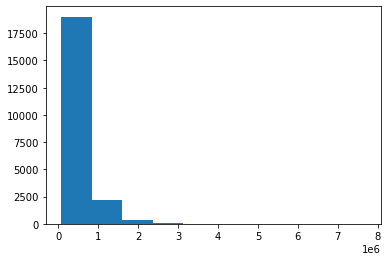

In [4]:
ax = plt.hist(data['price'])

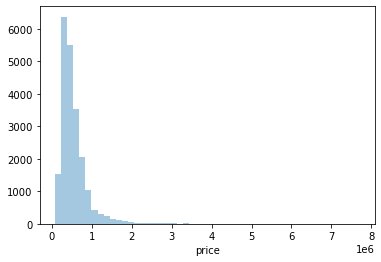

In [5]:
sns.distplot(data['price'], kde=False)

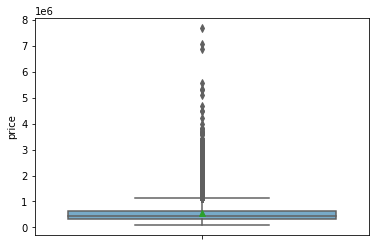

In [6]:
ax = sns.boxplot(y= 'price', data=data, palette= 'Blues', showmeans= True)

In [7]:
from scipy import stats
stats.describe(data['price'])

DescribeResult(nobs=21613, minmax=(75000, 7700000), mean=540088.1417665294, variance=134782378397.24687, skewness=4.023789858140135, kurtosis=34.577262255687536)

Graphical representations from the histogram and the boxplot has demonstrated the expected right skewness of the house prices data, which is further supported by reported skewness of 4.02 and kurtosis of 34.58 (this is extremely larger than 3). On average, customers spend approximately 540,088 dollars for a house with the standard deviation of 367,127.1965 dollars. There are some considerable outliers in the right tail of the distribution.

Exploratory analysis for waterfront location

In [8]:
data[['waterfront']].describe().round(5)

,waterfront
count,21613.00000
mean,0.00754
std,0.08652
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


In [9]:
data[['waterfront']].sum()

waterfront    163
dtype: int64

There are 163 1s recorded, and this means that house with waterfront only accounts for 163/21613=0.00754, or 0.754% in the sample. The figure aligns with the mean obtained from the data description table. Therefore, almost all observations (99.246%) do not have a waterfront location. This finding may be due to random sampling, or more intuitively, we can reasonably expect there would be a higher number of houses without waterfront as there might not be many feasible locations with waterfront to build houses.    

Joint exploratory analysis for waterfront location and house price

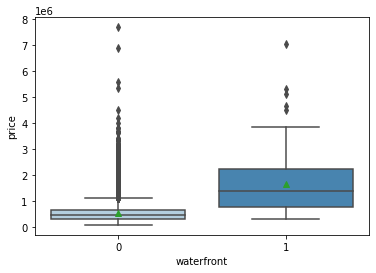

In [10]:
ax = sns.boxplot(x='waterfront', y='price', data=data, palette='Blues', showmeans= True)

In [11]:
data.loc[data['waterfront']== 0, 'price'].describe()

count    2.145000e+04
mean     5.315636e+05
std      3.415996e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.398970e+05
max      7.700000e+06
Name: price, dtype: float64

In [12]:
data.loc[data['waterfront']== 1, 'price'].describe()

count    1.630000e+02
mean     1.661876e+06
std      1.120372e+06
min      2.850000e+05
25%      7.600000e+05
50%      1.400000e+06
75%      2.215000e+06
max      7.062500e+06
Name: price, dtype: float64

In [13]:
stats.describe(data.loc[data['waterfront']== 0, 'price'])

DescribeResult(nobs=21450, minmax=(75000, 7700000), mean=531563.5998135199, variance=116690279653.07115, skewness=3.654989000312272, kurtosis=31.377220837393942)

In [14]:
stats.describe(data.loc[data['waterfront']== 1, 'price'])

DescribeResult(nobs=163, minmax=(285000, 7062500), mean=1661876.0245398772, variance=1255232816099.802, skewness=1.4427023109648562, kurtosis=3.127041653743727)

In [15]:
meandiff=1661876.0245398772 -  531563.5998135199
meandiff

1130312.4247263572

From the statistics summary, people who do not live in the waterfront area tend to spend about $531,563$ dollars for a house on average, whereas the corresponding figure in the waterfront area is $1,661,876$ dollars. The difference between the two figures is approximately $1,130,312$ dollars, which might be considerable. Moreover, the graphical representation also suggests the same pattern: the means of both groups seem to be not on the same level when scaled on one graph. Also, it is notable that data from both groups are quite right-skewed with the kurtosises obtained all greater than 3 and the  statistics are supported by outliers observed in the boxplots.

No data cleaning is performed due to several reasons:

1/No probable wrong records are observed in the data (i.e. no data is abnormally different regarding size from the others in the same random variables).

2/All the data have clear headings and units.

3/Unreasonably remove outliers would distort the observed relationship and correctness of random variables. As a result, wrong interpretation would occur and undermine the value of data.

### Part 2: Perform hypothesis tests 

### t-test

In [16]:
stats.ttest_ind(data.loc[data['waterfront']== 1, 'price'],data.loc[data['waterfront']==0, 'price'], equal_var = False)

Ttest_indResult(statistic=12.875876891278113, pvalue=1.3791122647490577e-26)

In [44]:
variance0 = 116690279653.07115
variance1 = 1255232816099.802
n0 = 21450
n1 = 163
df = (variance0/n0+variance1/n1)**2/((variance0/n0)**2/(n0-1)+(variance1/n1)**2/(n1-1))
print(df)

162.22896438139523


The hypotheses are:

$H_0 : \mu_{Waterfront} = \mu_{NoWaterfront}$ (the mean of price of houses with waterfront is equal to that of houses without waterfront)

$H_1 : \mu_{Waterfront} > \mu_{NoWaterfront}$ (the mean of price of houses with waterfront is larger than that of houses without waterfront)

Choose alpha = 0.05 as standard

The test statistic is 12.88, which follows a student-t distribution with approximately 162 degrees of freedom, provided the null hypothesis of equality, and the assumptions are, true. 

Since this is one-sided test, the p-value obtained is $P(t_{162}>12.88) =  (1.38 \times 10^{-26}) / 2 = 0.69 \times 10^{-26}$. At 5%  level of significance, we reject the null hypothesis and conclude that the mean of price of houses with waterfront is significant higher than that of houses without waterfront. 


The assumptions made are:

1/The data are independent and identically distributed in each group. This requires that each random variable has identical probability distribution and is mutually independent, which is not obvious without a clear description of the sampling process. However, we may assume it to be true in this case. 

2/The prices of houses are independent of one another, or price set of one house does not influence the value estimate of the others. Without clear description of the sampling process, we cannot validify with certainty, but we may assume it to be true in this case.  

3/Each group is normally distributed or the Central Limit Theorem holds: price is a bounded variable. It is reasonable that this variable has a lower bound of zero. Also, since the number of houses are limited and residents only have finite amounts of money, we can broadly accept that house price implicitly has an upper bound. Therefore, the fourth monent of this variable is finite, thus making the assumption valid. However, it is still worth taking into consideration that the exploratory analysis indicates a right-skewed distribution of the sample with numerous outliers for any decision-making. Finally, with the sizes of 163 and 21450, each group's sample size is large enough for the Central Limit Theorem (CLT) to work.  

### Median test

In [18]:
from scipy.stats import median_test
median_test(data.loc[data['waterfront']== 1, 'price'],data.loc[data['waterfront']==0, 'price'], ties = 'ignore', correction = False)

(122.15026644045584,
 2.140001560122751e-28,
 450000.0,
 array([[  152, 10597],
        [   11, 10681]], dtype=int64))

Since the median test only gives the two-sided p-value, the two-sided test is formed and illustrated below.

The hypotheses are:

$H_0 : Median_{0} = Median_{1}$ (the median of price of houses with waterfront  equal to that of houses without waterfront)
 
$H_1 : Median_{0} \neq Median_{1}$ (the median of price of houses with waterfront is not equal to that of houses without waterfront)

Choose alpha = 0.05 as standard

The test statistic is 122.15. Under the null hypothesis, this statitic follows a chi-squared distribution with 1 degree of freedom provided the assumptions are true. In this case, the p-value is a $P(\chi^2_1 > 122.15) = 2.14\times10^{-28}$. This is $<0.05$, thus we can reject the null hypothesis and conclude that the median of price of houses with waterfront is significantly different from that of houses without waterfront.



In [19]:
tab = np.array([[152, 10597], [11,10681]])
stats.chi2_contingency(tab, correction = False)

(122.15026644045584,
 2.140001560122751e-28,
 1,
 array([[   81.71666433, 10667.28333567],
        [   81.28333567, 10610.71666433]]))

The assumptions made are:

1/The data are independent and identically distributed in each group. This requires that each random variable has identical probability distribution and is mutually independent, which is not obvious without a clear description of the sampling process. However, we may assume it to be true in this case. 

2/The prices of houses are independent of one another, or price set of one house does not influence the value estimate of the others. Without clear description of the sampling process, we cannot validify with certainty, but we may assume it to be true in this case.  

3/Data are at least on the ordinal scale. This is satisfied since the the values recorded are numerical, which means that a median is identifiable.

Besides, it is necessary that the assumptions of the Pearson's chi-square test hold:

1/Each observed cross-tab count of the contingency table is a counting independent event. It can be violated if price of a house obtained is influenced by that of the other house (e.g. the owners may discuss about values of their real estate). Therefore, this assumption can not be validified withouth a clear description of the way the sample was collected. Hence, we assume it to be true. 

2/Each observed cross-tab count of the contingency table follows a Poisson distribution. This assumption can not be validified withouth a clear description of the way the sample was collected. Hence, we assume it to be true.

3/Each cell in the contigency table has expected value at least 5. This is satisfied since, from the output, the lowest expected number obtained is 81.28.

### Mann-whitney test

In [20]:
from scipy.stats import mannwhitneyu
mannwhitneyu(data.loc[data['waterfront']== 1, 'price'],data.loc[data['waterfront']==0, 'price'], alternative = 'greater')

MannwhitneyuResult(statistic=3090831.0, pvalue=1.6215210391178017e-64)

The hypotheses are:

$H_0 : P(Y_{1} > Y_{0}) = 0.5 $ (Price of house with waterfront has the same distribution as that without waterfront)

$H_1 : P(Y_{1} > Y_{0}) > 0.5 $ (Price of house with waterfront has a distribution shifted upwards compared to that without waterfront)

*$Y_{0}$ is the random variable from price of house without waterfront; $Y_{1}$ is the random variable from price of house with waterfront.

Choose alpha =0.05 as standard

The test statistic is $U=3090831$, which under the null follows a large sample normal distribution with mean and variance given by the test provided the assumptions are also true. In this case, the p-value is $P(U>3090831) = 1.62 \times 10^{-64}$, where the mean and the variance are specified in the test. This is <0.05, so we can reject the null hypothesis, and conclude that the waterfront area has a significant effect on the distribution of the house price volatility. More specifically, price of house with waterfront is expected to be higher than that of house without waterfront.

The assumptions made are:

1/The data are independent and identically distributed in each group. This requires that each random variable has identical probability distribution and is mutually independent, which is not obvious without a clear description of the sampling process. However, we may assume it to be true in this case. 

2/The prices of houses are independent of one another, or price set of one house does not influence the value estimate of the others. Without clear description of the sampling process, we cannot validify with certainty, but we may assume it to be true in this case.  
 
3/Data are at least on the ordinal scale (or $P(Y_{1}>Y_{0}) > 0$ makes sense). This is satisfied since the the values recorded are numerical, which means that a median is identifiable. From another perspective, the comparison $P(Y_{1}>Y_{0}) > 0$ makes sense since both are numerical and continuous random variables.

4/Each group's sample size has to be at least 8 for the Central Limit Theorem (CLT) to work. The assumption is satisfied here with smallest value obtained of 163. 


## Part 3: Consensus on three tests perfomed

All three tests need unclear assumptions regarding the idependence and identical distribution of data, and independence between two groups, but they can be broadly accepted. Nevertheless, with the t-test, the 4th moment assumption is still considerable given the long tail and large kurtosis observed from the graph and the statistics description. Therefore, it may be preferrable that the median test or Mann-whitney test are considered here, given the fact that they are highly robust to to outliers and shapes of the distributions. Regarding these two, it can be suggested that the Mann-whitney test is chosen since the remaining two Mann-whitney assumptions regarding sample size and data scale are clearly satisfied, whereas some Pearson's test assumptions from the median test are still questionable. Furthermore, the Mann-whitney has much higher power than the median test, and the median test does not directly address the question asked (i.e. it only indicates the difference between the two groups but cannot tell which group may have higher median due to lack of one-tailed test). 
Above all, it should be noted that all three tests reject the null hypothesis and confirm that that there is a significant difference in house prices betweem two areas. Although the Mann-whitney seems to be best option here, it is also worth conducting other types of test to gain a better understanding of the data collected and be more certain about the decision made.

## Part 4: Conduct Exploratory Analysis to detect possible Linear relationship

In [21]:
data[['sqm_living']].describe().round(5)

,sqm_living
count,21613.00000
mean,193.22740
std,85.32524
min,26.94166
25%,132.57153
50%,177.44333
75%,236.90078
max,1257.89669


The average are of houses is $193.23m^{2}$ with the standard deviation of $85.33m^{2}$ . The smallest house recorded in the sample has an are $26.94m^{2}$, which is approximately 46.69 times smaller than that of the largest house.

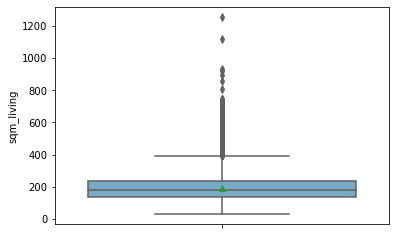

In [22]:
ax = sns.boxplot(y= 'sqm_living', data=data, palette= 'Blues', showmeans= True)

In [23]:
stats.describe(data['sqm_living'])

DescribeResult(nobs=21613, minmax=(26.94165738, 1257.896693), mean=193.2274002478402, variance=7280.396798094733, skewness=1.4714532950012835, kurtosis=5.241602522489551)

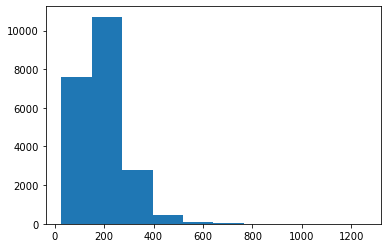

In [24]:
ax=plt.hist(data['sqm_living'])

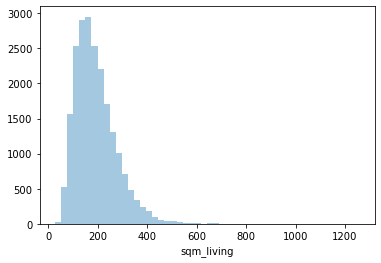

In [25]:
sns.distplot(data['sqm_living'], kde=False)

The histogram indicates that the data of house areas is right-skewed with significant long right tail. The kurtosis is reported as 5.24, supporting the graphical representation of the graph.

Exploratory analysis for relationship of house area and price

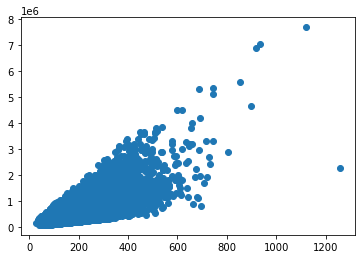

In [26]:
plt.scatter(x=data['sqm_living'], y=data['price'])

In [27]:
np.corrcoef(x= data['sqm_living'], y= data['price'])

array([[1.        , 0.70203505],
       [0.70203505, 1.        ]])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


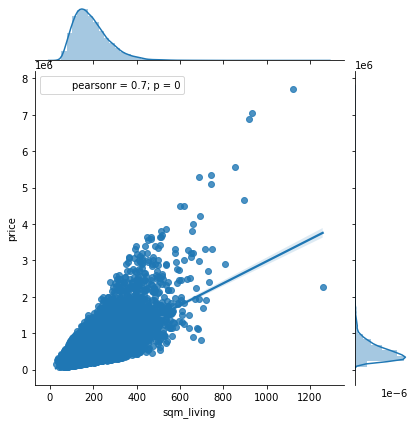

In [28]:
sns.jointplot(x=data['sqm_living'], y=data['price'], kind="reg").annotate(stats.pearsonr)

The scatterplot suggests that there seems to be a relationship between the area of a house and its price. More specifically, from the plot, it is reasonable to state that an increase in area would lead to an increase in price of house. In support of the graph, in terms of the strength and direction of fit, the correlation coefficient between two varibles, which is 0.7, also indicates there is a quite strong positive linear relationship. Also, the correlation is highly considerably different to 0 (p-val = 0) For further insight information, a simple linear regression using OLS model is carried out.

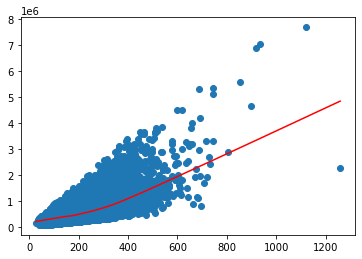

In [29]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
plt.scatter(data['sqm_living'],data['price'])
z1 = lowess(data['price'], data['sqm_living'], frac=1./5)  
plt.plot(z1[:,0],z1[:,1],'red')


Let $A$ is the random variable of house area, and $P$ is the random variable of house price

Regarding the apporiateness of a linear model here, the initial plot tends to support this idea. A "lowess" locally-smoothed regresiion curve fit through the data indicates linearity up $A = 300m^{2}$, and the line becomes steeper afterwards. This may or may not be becasue of "end effects" with the presence of many observations with large areas and high prices  and few observations with large areas and low prices at the top right of the graph. Still, overall the pattern seems to be linear and smooth, and there is not any significant indication of other fitted models. 

## Part 5: Simple Linear Regression Analysis

No data cleaning is performed due to several reasons:

1/No probable wrong records are observed in the data (i.e. no data is abnormally different regarding size from the others in the same random variables).

2/All the data have clear headings and units.

3/Unreasonably remove outliers would distort the observed relationship and correctness of random variables. As a result, wrong interpretation would occur and undermine the value of data.

Ordinary Least Squares (OLS)

In [30]:
import statsmodels.formula.api as smf
reg = smf.ols(formula= 'price ~ sqm_living', data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:19:38   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqm_living  3020.6321     20.843    144.920      0.000    2979.777    3061.487
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                         523.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
reg.mse_resid**0.5

261452.8876013142

The estimated relationship is: $\hat{P} = -43580 + 3020.6321 A$ (where $\hat{P}$ is the predicted price of a house given the area $A$ measured in square meter). From the model, it can be said that the effect of area increasing by $1m^{2}$ is that the house price tends to rise by $3020.6321$ dollars, on average. The 95% confidence interval of $\hat{\beta}_1$ does not include 0, thus indicating a considerable relationship between area and price of houses. 
The model $R^{2} = 0.493$ or 49.3%. This figure is not considerably high, thus only representing a moderate strength of fit. The SER is  $261452.89$ dollars, which indicates the standard deviation of observed residuals. In order to assess the magnitude of this standard deviation, it is necessary to consult with real estate agents. However, at first glance, the volatility of $261452.89$ dollars can be argued to be quite significant.

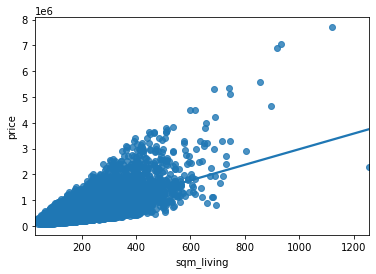

In [32]:
fig, ax= plt.subplots()
sns.regplot(data['sqm_living'],data['price'], ci=None, ax=ax)

Text(0.5, 1.0, 'Predictor vs residuals')

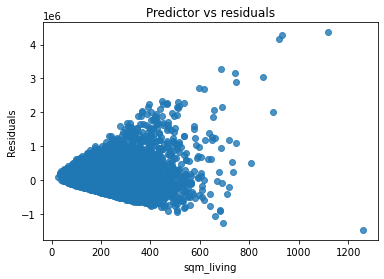

In [33]:
fig, ax= plt.subplots()
sns.regplot(data['sqm_living'], reg.resid, fit_reg= False)
ax.set_xlabel('sqm_living')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')


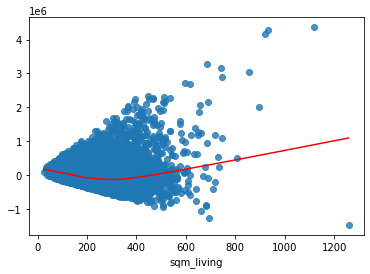

In [34]:
sns.regplot(data['sqm_living'], reg.resid, fit_reg=False)
ax.set_xlabel('sqm_living')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')
z1 = lowess(reg.resid, data['sqm_living'], frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
#plt.show()

In [35]:
reg.resid.describe()

count    2.161300e+04
mean     1.816818e-11
std      2.614468e+05
min     -1.476062e+06
25%     -1.474860e+05
50%     -2.404282e+04
75%      1.061821e+05
max      4.362067e+06
dtype: float64

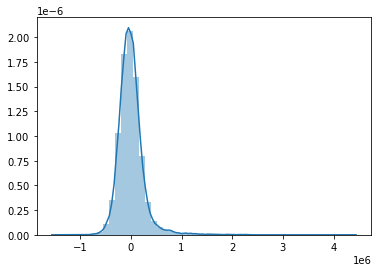

In [36]:
sns.distplot(reg.resid)

Here are the other assumptions of simple linear regression using OLS:

1/Linearity:
A "lowess" locally-smoothed regression curve fit through the data indicates linearity up $A = 300m^{2}$, and the line becomes steeper afterwards. This may or may not be becasue of "end effects" as almost all observations with extremely large areas have positive residuals. Still, overall the pattern seems to be linear and there is not any significant indication of other fitted models. Also, the residual plot suggests that the errors are nicely and evenly distributed around $X=0$.  Thus the assumption may be satisfied.

2/ Exogeneity: 
The 'lowess' locally smoothed plot of the residuals indicates that $E(\varepsilon | X) \approx 0$ for $ 200 < X = A < 400$ but not outside that range. Overall, $E(\varepsilon | X)$ seems to be larger than zero. However, this result may be due to end effects, and/or outliers as almost all observations with extremely large areas have positive residuals. Therefore, due to outlying observation, assessing $E(\epsilon|X)=0$ in extreme details is not very vital and necessary here. Furthermore, a mean of $1.82 \times 10^{-11}$ is obtained from the residual statistical summary and supported by the graphical representation above, so we may accept the assumption to be true.   

3/Independence: 
Withouth clear description of the data collection procedure, it cannot be confirmed with certainty whether the data pairs are idependent and identically distributed or not. However, we can assume that each house observation is independent of one another. Therefore, the data inputs, which include price and area are also independent of one another. 

From a different standpoint, given the fact that the total area of land is limited, we might say house areas are dependent of one another since they contribute to the overall area. For example, if two houses have a total area of 1000 square meters, than knowing area of one house would make area of the other one fixed. Nevertheless, as long as the data of each house are collected distinctively, without very strict definition, the assumption can be accepted.

4/4th moment exists:
Price is a bounded variable. It is reasonable that this variable has a lower bound of zero. Also, since the number of houses are limited and residents only have finite amounts of money, we can broadly accept that house price implicitly has an upper bound. Similarly, area cannot be less than zero and have a finite upper limit. Therefore, the assumption is satisfied here

5/ Constant error variance:
This assumption can be said to be violated since the residual plot suggests unequal variances of errors in the data sample. More specifically, the variance tends to be small at first but becomes larger as the area of houses increase.

Least Absolute Deviations (LAD)

In [37]:
lad= smf.quantreg(formula = 'price ~ sqm_living', data=data).fit(q=0.5)
lad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.2480
Model:                       QuantReg   Bandwidth:                   3.151e+04
Method:                 Least Squares   Sparsity:                    4.833e+05
Date:                Sun, 04 Apr 2021   No. Observations:                21613
Time:                        18:19:40   Df Residuals:                    21611
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+04   4068.957     12.984      0.000    4.49e+04    6.08e+04
sqm_living  2332.2000     19.263    121.069      0.000    2294.442    2369.958
==============================================================================
"""

In [38]:
r_adj_lad = (reg.mse_total - lad.mse_resid)/reg.mse_total 
r_adj_lad

0.45728335320643854

In [39]:
lad.mse_resid**0.5

270460.05333619006

The estimated relationship is: $\hat{P} = 52,830 + 2332.2 A$ (where $\hat{P}$ is the predicted price of a house given the area $A$ measure in square meter). From the model, it can be said that the effect of area increasing by $1m^{2}$ is that the median house price tends to rise by $2332.2$ dollars. The 95% confidence interval of $\hat{\beta}_1$ does not include 0, thus indicating a considerable relationship between area and price of houses. Regarding strength of fit, since we do not have  $SST= RegSS +RSS$ for LAD estimation, $R^2_{adj}$ is more suitable here as it measures how much the SER has reduced $S^2_Y$. From the output above, $R^2_{adj} = 0.457$, which is slightly smaller than that of the OLS model ($0.493$). The standard deviation of the observed residuals is $270460.05$ dollars. In order to evaluate the magnitude of standard deviation, it is necessary to discuss with real estate agents.  However, at first glance, the volatility of $270460.05$ dollars can be argued to be quite significant.      

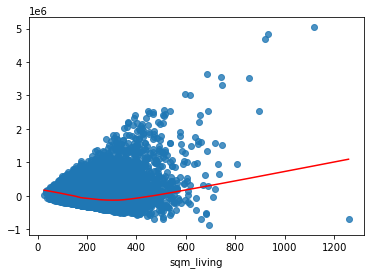

In [40]:
sns.regplot(data['sqm_living'], lad.resid, fit_reg=False)
ax.set_xlabel('sqm_living')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')
z1 = lowess(reg.resid, data['sqm_living'], frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')

In [41]:
nonnegative=0
negative=0
for i in lad.resid:
    if i >= 0:
        nonnegative = nonnegative + 1
    else:
        negative = negative + 1
print(nonnegative)
print(negative)
    

10806
10807


In [42]:
lad.resid.describe()

count    2.161300e+04
mean     3.660987e+04
std      2.679644e+05
min     -8.735000e+05
25%     -1.163333e+05
50%     -3.662426e-07
75%      1.248333e+05
max      5.036333e+06
dtype: float64

Here are the assumptions of simple linear regression using LAD model:
    
1/Linearity:
A "lowess" locally-smoothed regresiion curve fit through the data indicates linearity up $A = 300m^{2}$, and the line becomes steeper afterwards. This may or may not be becasue of "end effects" as almost all observations with extremely large areas have positive residuals. Still, overall the pattern seems to be linear and there is not any significant indication of other fitted models. Also, the residual plot suggests that the errors are nicely and evenly distributed around $X=0$. Thus the assumption may be satisfied.

2/The median of $\varepsilon | X =0$:
The 'lowess' locally smoothed plot of the residuals appears to have more residuals allocating above zero compared to those under zero. Nevertheless, the number of nonegative and negative residuals are quite balanced (10806 and 10807), and the median of the sample reported is $-3.66 \times 10^{-7}$. Hence, the assumption may be true.

3/Independence: 
Withouth clear description of the data collection procedure, it cannot be confirmed with certainty whether the data pairs are independent and identically distributed or not. However, we can assume that each house observation is independent of one another. Therefore, the data inputs, which include price and area are also independent of one another. 

From a different standpoint, given the fact that the total area of land is limited, we might say house areas are dependent of one another since they contribute to the overall area. For example, if two houses have a total area of 1000 square meters, than knowing area of one house would make area of the other one fixed. Nevertheless, as long as the data of each house are collected distinctively, without very strict definition, the assumption can be accepted.

4/Continuity of density:
We do not know  here but will simply assume it to be true. $p(Y_{i}|X_{i})$Since area and house price are two continuous random variables, it may be reasonable that $p(Y_{i}|X_{i})$ is a continuous function. 

5/1st absolute moment of $Y$ exists ($E(|Y|) < \infty$):
Since $Y>0$, we have $E(Y) = E(|Y|)$. If house price is upper and lower bounded, then $E(Y) <\infty$ is correct, so the assumption is satisfied.

6/2nd moment of $X$ exists ($E(X^{2}) < \infty$): The area should be a finite random variable with limited upper bound and lower bound of 0. Hence, $X^{2}$ should be a finite random variable, so the assumption is satisfied


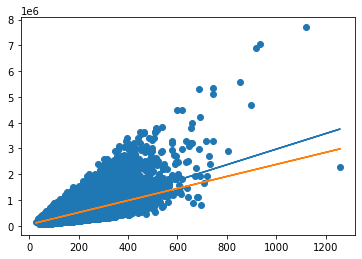

In [43]:
resid1 = reg.resid
resid2 = lad.resid
fit1 = reg.fittedvalues
fit2 = lad.fittedvalues
plt.scatter(data['sqm_living'], data['price'])
plt.plot(data['sqm_living'], fit1)
plt.plot(data['sqm_living'], fit2)

## Part 6: Report Summary

The task is designed into two parts, and the first one is to determine the statistical significant difference of house prices classified by waterfront area using exploratory analysis and hypothesis testing. Both ways suggest the difference is statistically significant. In particular, regarding hypothesis testing, all three tests reject the null hypothesis, with the Mann-whitney test yielding the most trustworthy results with many assumptions satisfied. However, if there is no ambiguity in the sampling process, t-test would become more useful and preferrable. This finding has some indications for both buyers and sellers. More specifically, they can expect a higher value of houses in waterfront area comparing to those outside the waterfront area, thus giving a more precise estimate about real estate when transacting.

The second task is to examine the relationship between area and price of  houses using LAD and OLS model. In summary, both indicate a significant increase in house price corresponding to increase in area. More specifically, given $1m^{2}$ increase in area, the OLS model suggests a rise of $3020.63$ dollars in price on average, whereas the LAD model indicates an increase in median of $2332.2$ dollars. In terms of model credibility, we can broadly accept that LAD model satisfies all assumptions, whereas in the OLS model homoskedaticity might be violated. Still, overall these models may be good starting points for buyers and sellers to estimate real estate values. As a result, both sides can negotiate based on figures obtained from the model so that transactions would not be overvalued or undervalued. However, it should be aware that area is only one of many predictors of house prices. That is why the variation in Y is not fully explained in these simple regression models as measured by $R^{2}$ and $R^2_{adj}$.

From investors' perspective, these findings show some ways to earn positive returns. In one way, out of similar cheap houses in undeveloped area, investors can select house with waterfront because it is likely that the value of that house will increase significantly when the area starts to be populated. If the intuition suggested above is true in real life, which means that there are less locations with waterfront comparing to those without, it is a good idea investors should rush to grab any possible oppotunities before waterfront locations will be sold out. Furthermore, given the positive relationship between house price and area, buyers can further expect that among all houses with waterfront, the one with largest area would tend to be the most valuable, and acquiring that real estate would probably make a significant return. Nonetheless, again investors should acknowledge that location and area do not totally decide value of real estate. Other considerable predictors might be number of rooms, neighborhood safety index, design style, etc. These additional information should give ways to multiple real estate strategies. For example, investors can buy an old house in waterfront area at cheap price, rebuild it with unique and comfortable style, and resell at much higher value. In short, there are ways earn returns using these findings, and one should develop his/her suitable strategy to make investment truly valuable. 

